In [255]:
# Importing all the necessary libaries that will be used through the project

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import geopandas 

In [256]:
state = geopandas.read_file("../ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [278]:
crime = pd.read_csv("../us_statewide_crime.csv")
crime.head()

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
0,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
1,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
2,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
3,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
4,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7


In [257]:
# Read in the 1980 and 2021 data to compare air quality in lockdown and before lockdown

oldAir_df = pd.read_csv("../daily_aqi_by_county_1980.csv")
newAir_df = pd.read_csv("../daily_aqi_by_county_2024.csv")

In [268]:
# Group by "State Name" and calculate the mean AQI for oldAir_df
oldAir_mean_aqi = oldAir_df.groupby("State Name")["AQI"].mean().reset_index()

# Group by "State Name" and calculate the mean AQI for newAir_df
newAir_mean_aqi = newAir_df.groupby("State Name")["AQI"].mean().reset_index()


# Display the results
print(oldAir_mean_aqi)
print(newAir_mean_aqi)

              State Name        AQI
0                Alabama  65.240076
1                 Alaska  45.604414
2                Arizona  93.704272
3               Arkansas  41.818182
4             California  68.606929
5               Colorado  49.718805
6            Connecticut  89.888818
7               Delaware  53.458580
8   District Of Columbia  79.226776
9                Florida  45.447225
10               Georgia  35.517600
11                Hawaii  16.803324
12                 Idaho  90.588599
13              Illinois  58.990562
14               Indiana  66.820131
15                  Iowa  42.738400
16                Kansas  49.538889
17              Kentucky  66.849469
18             Louisiana  39.367008
19                 Maine  65.496812
20              Maryland  64.122608
21         Massachusetts  62.852991
22              Michigan  46.613220
23             Minnesota  47.684480
24           Mississippi  35.997091
25              Missouri  72.186503
26               Montana  51

In [281]:
aqi_crime_one = pd.merge(crime, oldAir_mean_aqi, left_on='State', right_on='State Name', how='outer')
aqi_crime_two = pd.merge(crime, newAir_mean_aqi, left_on='State', right_on='State Name', how='outer')

In [282]:
aqi_crime_two.head(5)

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,State Name,AQI
0,Alabama,486.0,7.4,14.7,77.5,20.4,26.0,4.6,70.2,Alabama,36.948757
1,Alaska,567.0,4.3,8.4,90.4,28.1,23.2,6.6,41.6,Alaska,39.692157
2,Arizona,532.0,7.0,13.5,85.1,24.6,23.5,3.9,87.9,Arizona,45.279456
3,Arkansas,445.0,6.3,15.8,81.7,18.4,24.7,4.4,49.0,Arkansas,42.311877
4,California,622.0,6.1,14.0,81.2,27.5,21.8,4.9,96.7,California,45.828512


In [272]:
# Merge the state geodataset with the old AQI dataset
full_old = pd.merge(state, oldAir_mean_aqi, left_on='name', right_on='State Name', how='outer')

# Merge the state geodataset with the new AQI dataset
full_new = pd.merge(state, newAir_mean_aqi, left_on='name', right_on='State Name', how='outer')


In [276]:
full_old.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,State Name,AQI
0,Admin-1 scale rank,2.0,USA-3514,3514.0,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1.0,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",Minnesota,47.684480
1,Admin-1 scale rank,2.0,USA-3515,3515.0,US-MT,http://en.wikipedia.org/wiki/Montana,US,1.0,Montana,MT|Mont.,...,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",Montana,51.760739
2,Admin-1 scale rank,2.0,USA-3516,3516.0,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1.0,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",North Dakota,24.546099
3,Admin-1 scale rank,2.0,USA-3517,3517.0,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8.0,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",Hawaii,16.803324
4,Admin-1 scale rank,2.0,USA-3518,3518.0,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1.0,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",Idaho,90.588599


<Axes: >

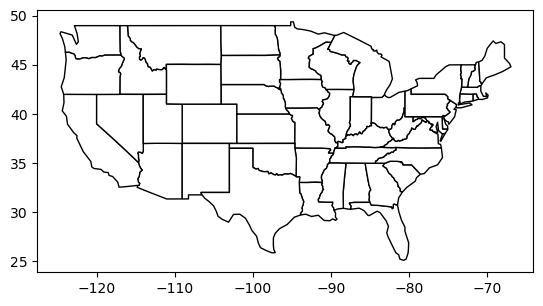

In [274]:
full_lower = full_old.drop([3, 50])
full_lower.plot(color='white', edgecolor='black')

In [ ]:
import folium
m = full_lower.explore(
    column="AQI", 
    legend=True,  # show legend
    tooltip='State',  # hide tooltip
    name="air quality",  # name of the layer in the map
)
m = full_lower.explore(
    column="Unemployed", 
    legend=True,  # show legend
    tooltip='State',  # hide tooltip
    popup=["Violent_Crime", 'Murder_Rate','Poverty','High_School', 'College', 
          'Single_Parent', 'Metropolitan'],  # show popup (on-click)
    name="crime",  # name of the layer in the map
)

#folium.TileLayer("CartoDB positron", show=False).add_to(m)  
folium.LayerControl().add_to(m) 

title_html = '''
             <h3 align="center" style="font-size:16px"><b>The choropleth map of US unemployment rate</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))


m  # show map

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Rename columns for convenience
full_old = full_old.rename(columns={"State Name": "State", "AQI": "AQI"})
full_new = full_new.rename(columns={"State Name": "State", "AQI": "AQI"})

# Verify data structure
print(full_old[["State", "AQI"]].head())


        State        AQI
0     Alabama  65.240076
1      Alaska  45.604414
2     Arizona  93.704272
3    Arkansas  41.818182
4  California  68.606929


In [ ]:
import folium
from folium import Choropleth

# Filter out rows with missing geometries
full_old = full_old[full_old.geometry.notnull()]

full_old_gdf = geopandas.GeoDataFrame(full_old, geometry=full_old.geometry)
if full_old_gdf.crs != "EPSG:4326":
    full_old_gdf = full_old_gdf.to_crs("EPSG:4326")

m = folium.Map(location=[37.8, -96.9], zoom_start=4)
Choropleth(
    geo_data=full_old_gdf,
    data=full_old_gdf,
    columns=["State", "AQI"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average AQI (1980)",
    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    missing_kwds = {'color':'lightgrey',
                            'edgecolor': 'red', 
                            'hatch': '///', 
                            'label': 'Missing values'}

).add_to(m)

folium.GeoJson(
    full_old_gdf,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(
        fields=["State", "AQI"],
        aliases=["State:", "Average AQI:"],
        localize=True
    )
).add_to(m)

m.save("aqi_choropleth_1980.html")
m


In [ ]:
import folium
from folium import Choropleth

# Filter out rows with missing geometries
full_new = full_new[full_new.geometry.notnull()]

full_new_gdf = geopandas.GeoDataFrame(full_new, geometry=full_new.geometry)
if full_new_gdf.crs != "EPSG:4326":
    full_new_gdf = full_new_gdf.to_crs("EPSG:4326")

m = folium.Map(location=[37.8, -96.9], zoom_start=4)
Choropleth(
    geo_data=full_new_gdf,
    data=full_new_gdf,
    columns=["State", "AQI"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average AQI (2024)",
    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
).add_to(m)

folium.GeoJson(
    full_new_gdf,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(
        fields=["State", "AQI"],
        aliases=["State:", "Average AQI:"],
        localize=True
    )
).add_to(m)

m.save("aqi_choropleth_2024.html")
m
